#Implementando KNN no DATAset Iris

In [31]:
#Biblioteca necessária
import pandas as pd
#importando o dataset
iris = pd.read_csv("https://raw.githubusercontent.com/fatecitu/curso-data-science/main/iris/iris.csv")
#iris.head() imprimindo a tabela antes de "traduzi-la"
iris.rename(columns={'SepalLengthCm': 'ComprimentoSepala', 'SepalWidthCm': 'LarguraSepala',
                      'PetalLengthCm': 'ComrpimentoPetala', 'PetalWidthCm': 'LarguraPatala',
                      'Species': 'Especie'}, inplace = True)
iris.head() #imprimi a tabela com names em pt-br
iris.describe()#trás cada uma das propriedades.


,Id,ComprimentoSepala,LarguraSepala,ComrpimentoPetala,LarguraPatala
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<function matplotlib.pyplot.show(*args, **kw)>

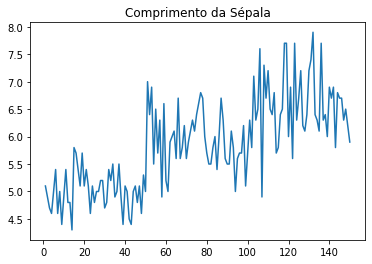

In [32]:
# Plotando os dados
import matplotlib.pyplot as plt

plt.title("Comprimento da Sépala")
plt.plot(iris.Id, iris["ComprimentoSepala"])
plt.show

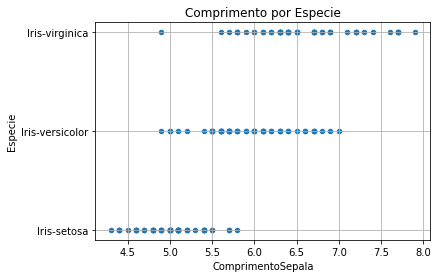

In [33]:
#Plotado outra análise
iris.plot(kind="scatter",
          x="ComprimentoSepala",
          y="Especie")
plt.title("Comprimento por Especie")
plt.grid()

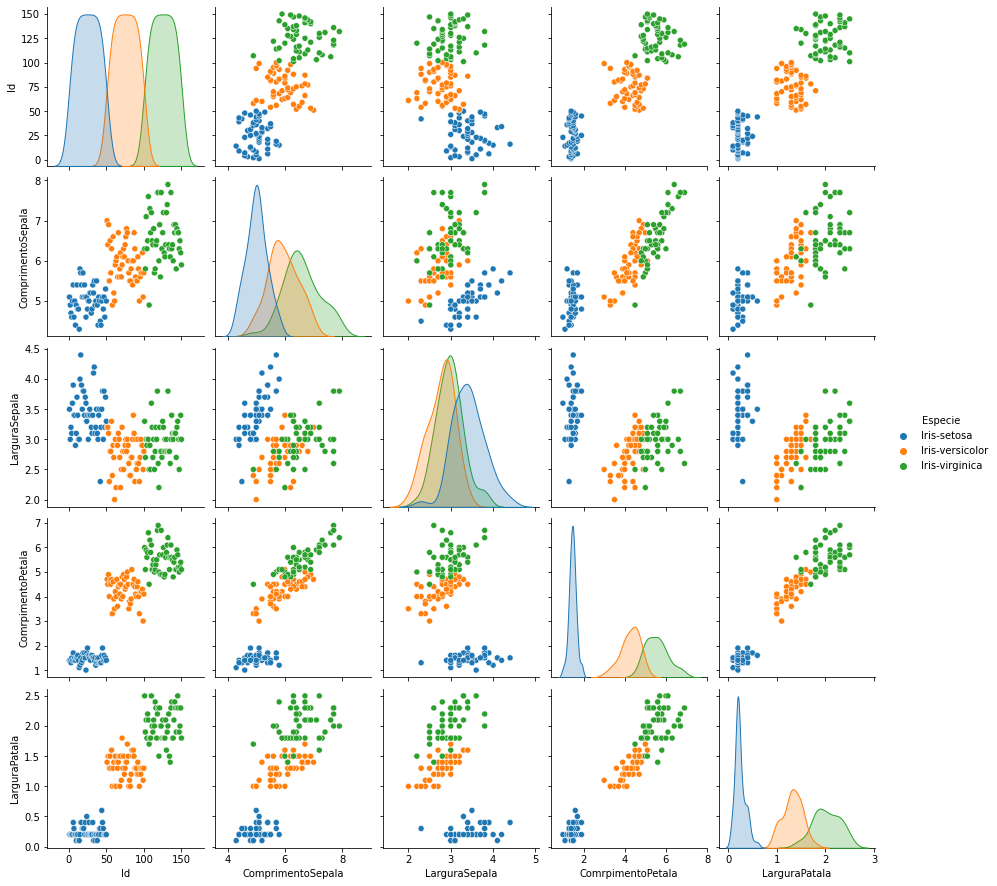

In [34]:
#importando a dispersão dos dados
import seaborn as sb
sb.pairplot(iris, hue="Especie");

In [35]:
#Implementando o KNN
#Bibliotecaas necessárias
import numpy as np
from sklearn.model_selection import train_test_split
#carrega o algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier
#carregando os dados (eixo X)
X = np.array(iris.drop(['Id', 'Especie'], axis =1)) #removemos id e espécie
#caregando as classifcações (eixo Y)
y= np.array(iris.Especie)

#mostrando o array X
X

#mostrando o array y
y

#treinando os dados e testando
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,
                                            train_size=0.3,
                                            test_size=0.7)
#instanciando o modelo KNN
modelo_KNN=KNeighborsClassifier(n_neighbors=3)
#treinando o modelo
modelo_KNN.fit(X_treino, y_treino)
#validando o modelo utilizando o conjunto de teste
acuracia = str (round(modelo_KNN.score(X_teste, y_teste)*100, 2))+'%'
#imprimindo o resultado
print("A acurácia do modelo foi", acuracia)

A acurácia do modelo foi 96.19%


In [36]:
#testando o modelo KNN criado 
modelo_KNN.predict([
    [4.8,31,1.6,0.2]
    ])#deve ser setosa

array(['Iris-setosa'], dtype=object)

In [37]:

modelo_KNN.predict([
    [6.4,3.2,4.5,1.5]
    ])#deve ser versicolor

array(['Iris-versicolor'], dtype=object)

In [38]:
#Simulando um input dos dados
cs=float (input("comprimento da Sépala: "))
ls=float (input("Largura da Sépala:     "))
cp=float (input("comprimento da Pétala: "))
lp=float (input("Largura da Pétala:     "))

modelo_KNN.predict([
    [cs, ls, cp, lp]
    ])

comprimento da Sépala: 5.1
Largura da Sépala:     3.5
comprimento da Pétala: 1.4
Largura da Pétala:     0.2


array(['Iris-setosa'], dtype=object)

In [39]:
#calculando a acurácia % do algoritmo
#Implementando o KNN
#Bibliotecaas necessárias
import numpy as np
from sklearn.model_selection import train_test_split
#carrega o algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier
#carregando os dados (eixo X)
X = np.array(iris.drop(['Id', 'Especie'], axis =1)) #removemos id e espécie
#caregando as classifcações (eixo Y)
y= np.array(iris.Especie)

#mostrando o array X
X

#mostrando o array y
y

#treinando os dados e testando
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,
                                            train_size=0.3,
                                            test_size=0.7)
#aplicando interações 
interacoes = 1000
scores =[]
for i in range(interacoes):
  X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,
                                                          train_size=0.3,
                                                          test_size=0.7)
  modelo = KNeighborsClassifier()
  modelo.fit(X_treino, y_treino)
  acuracia = modelo.score(X_teste, y_teste)
  scores.append(acuracia)

  print("Média: {:.2f}%".format(np.mean(scores)*100))
  print("Desvio Padrão: {:.2f}%".format(np.std(scores)*100))

Média: 95.24%
Desvio Padrão: 0.00%
Média: 95.24%
Desvio Padrão: 0.00%
Média: 94.60%
Desvio Padrão: 0.90%
Média: 94.76%
Desvio Padrão: 0.82%
Média: 95.43%
Desvio Padrão: 1.52%
Média: 95.71%
Desvio Padrão: 1.53%
Média: 94.56%
Desvio Padrão: 3.17%
Média: 94.76%
Desvio Padrão: 3.01%
Média: 94.92%
Desvio Padrão: 2.87%
Média: 95.14%
Desvio Padrão: 2.81%
Média: 95.06%
Desvio Padrão: 2.69%
Média: 94.60%
Desvio Padrão: 2.99%
Média: 94.58%
Desvio Padrão: 2.88%
Média: 94.76%
Desvio Padrão: 2.85%
Média: 94.92%
Desvio Padrão: 2.82%
Média: 95.06%
Desvio Padrão: 2.78%
Média: 95.24%
Desvio Padrão: 2.79%
Média: 95.40%
Desvio Padrão: 2.79%
Média: 95.44%
Desvio Padrão: 2.72%
Média: 95.57%
Desvio Padrão: 2.72%
Média: 95.24%
Desvio Padrão: 3.04%
Média: 95.24%
Desvio Padrão: 2.97%
Média: 95.28%
Desvio Padrão: 2.91%
Média: 95.08%
Desvio Padrão: 3.01%
Média: 95.24%
Desvio Padrão: 3.05%
Média: 95.02%
Desvio Padrão: 3.18%
Média: 94.96%
Desvio Padrão: 3.14%
Média: 95.03%
Desvio Padrão: 3.11%
Média: 94.81%
Desvio

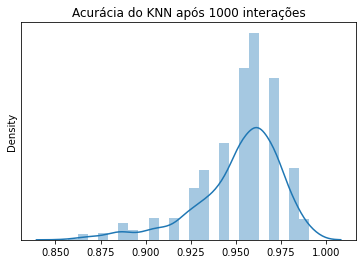

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.distplot(scores)
plt.yticks([])
plt.title("Acurácia do KNN após "+str(interacoes)+" interações")
plt.show;